<a href="https://colab.research.google.com/github/duc-ke/DNN_CV_complete_guide/blob/main/st02/opencv_faster_rcnn_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### OpenCV DNN 패키지를 이용하여 Faster R-CNN 기반의 Object Detection 수행(inference만)
* Tensorflow 에서 Pretrained 된 모델 파일을 OpenCV에서 로드하여 이미지와 영상에 대한 Object Detection 수행. 
* Faster RCNN with ResNet50 backbone.

#### 입력 이미지로 사용될 이미지 다운로드/보기

In [ ]:
!pwd

/content


In [ ]:
!mkdir /content/data
# -O 옵션 : 경로와 파일이름을 지정가능
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

mkdir: cannot create directory ‘/content/data’: File exists
--2022-04-28 14:10:08--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.02s   

2022-04-28 14:10:09 (15.5 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



image shape: (633, 806, 3)


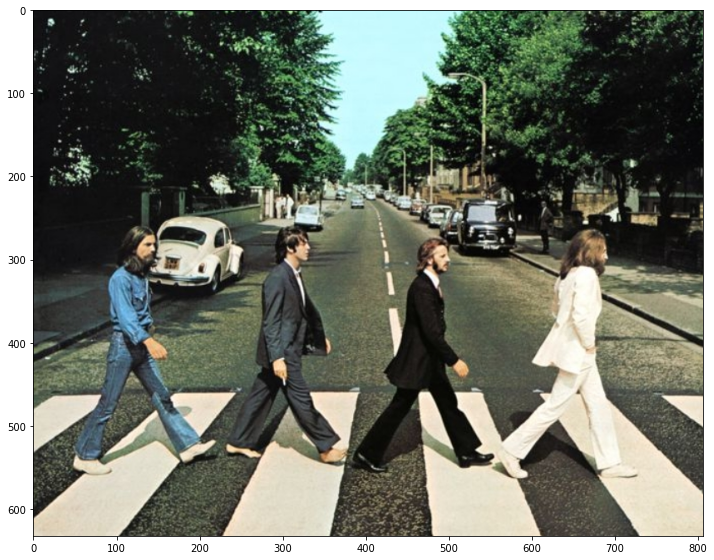

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('./data/beatles01.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('image shape:', img.shape)  # height, width, C
plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

#### Tensorflow에서 Pretrained 된 Inference모델(Frozen graph)와 환경파일을 다운로드 받은 후 이를 이용해 OpenCV에서 Inference 모델 생성
* https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API 에 다운로드 URL 있음.
* pretrained 모델은 http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz 에서 다운로드 후 압축 해제
* pretrained 모델을 위한 환경 파일은 https://github.com/opencv/opencv_extra/blob/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt 에서 다운로드 
* download된 모델 파일과 config 파일을 인자로 하여 inference 모델을 DNN에서 로딩함. 


In [ ]:
!mkdir ./pretrained
!wget -O ./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
!wget -O ./pretrained/config_graph.pbtxt https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt

mkdir: cannot create directory ‘./pretrained’: File exists
--2022-04-28 14:10:10--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet50_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.199.128, 2607:f8b0:400e:c06::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.199.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381355771 (364M) [application/x-tar]
Saving to: ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’

./pretrained/faster 100%[===================>] 363.69M   192MB/s    in 1.9s    

2022-04-28 14:10:12 (192 MB/s) - ‘./pretrained/faster_rcnn_resnet50_coco_2018_01_28.tar.gz’ saved [381355771/381355771]

--2022-04-28 14:10:12--  https://raw.githubusercontent.com/opencv/opencv_extra/master/testdata/dnn/faster_rcnn_resnet50_coco_2018_01_28.pbtxt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.11

In [ ]:
# -C 옵션 : 경로 지정
!tar -xvf ./pretrained/faster*.tar.gz -C ./pretrained 

faster_rcnn_resnet50_coco_2018_01_28/
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet50_coco_2018_01_28/checkpoint
faster_rcnn_resnet50_coco_2018_01_28/pipeline.config
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet50_coco_2018_01_28/model.ckpt.meta
faster_rcnn_resnet50_coco_2018_01_28/saved_model/
faster_rcnn_resnet50_coco_2018_01_28/saved_model/saved_model.pb
faster_rcnn_resnet50_coco_2018_01_28/saved_model/variables/
faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb


위의 resnet50_coco의 의미:
* coco데이터셋, 즉 80개 클래스를 pretrained된 model이란 의미

In [ ]:
!pwd
!ls -lia ./pretrained/faster_rcnn_resnet50_coco_2018_01_28

/content
total 296076
3146788 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 .
3146784 drwxr-xr-x 3 root   root      4096 Apr 28 13:50 ..
3146791 -rw-r--r-- 1 345018 5000        77 Feb  1  2018 checkpoint
3146829 -rw-r--r-- 1 345018 5000 120549957 Feb  1  2018 frozen_inference_graph.pb
3146794 -rw-r--r-- 1 345018 5000 176914228 Feb  1  2018 model.ckpt.data-00000-of-00001
3146790 -rw-r--r-- 1 345018 5000     14460 Feb  1  2018 model.ckpt.index
3146825 -rw-r--r-- 1 345018 5000   5675175 Feb  1  2018 model.ckpt.meta
3146792 -rw-r--r-- 1 345018 5000      3240 Feb  1  2018 pipeline.config
3146826 drwxr-xr-x 3 345018 5000      4096 Feb  1  2018 saved_model


* model.ckpt.data-00000-of-00001 : 체크포인트 학습된 모델
* frozen : inference용으로 바꾼 모델. 더이상 업데이트 하지 않는 모델. 학습이 끝난 모델

#### dnn에서 readNetFromTensorflow()로 tensorflow inference 모델을 로딩

In [ ]:
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb', 
                                     './pretrained/config_graph.pbtxt')
type(cv_net)

cv2.dnn_Net

#### coco 데이터 세트의 클래스id별 클래스명 지정. 
80개 클래스가 있는데,  

In [ ]:
# OpenCV Yolo용 (0-79)
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

In [ ]:
# OpenCV Tensorflow Faster-RCNN용 (0-90)
labels_to_names_0 = {0:'person',1:'bicycle',2:'car',3:'motorcycle',4:'airplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',
                    10:'fire hydrant',11:'street sign',12:'stop sign',13:'parking meter',14:'bench',15:'bird',16:'cat',17:'dog',18:'horse',19:'sheep',
                    20:'cow',21:'elephant',22:'bear',23:'zebra',24:'giraffe',25:'hat',26:'backpack',27:'umbrella',28:'shoe',29:'eye glasses',
                    30:'handbag',31:'tie',32:'suitcase',33:'frisbee',34:'skis',35:'snowboard',36:'sports ball',37:'kite',38:'baseball bat',39:'baseball glove',
                    40:'skateboard',41:'surfboard',42:'tennis racket',43:'bottle',44:'plate',45:'wine glass',46:'cup',47:'fork',48:'knife',49:'spoon',
                    50:'bowl',51:'banana',52:'apple',53:'sandwich',54:'orange',55:'broccoli',56:'carrot',57:'hot dog',58:'pizza',59:'donut',
                    60:'cake',61:'chair',62:'couch',63:'potted plant',64:'bed',65:'mirror',66:'dining table',67:'window',68:'desk',69:'toilet',
                    70:'door',71:'tv',72:'laptop',73:'mouse',74:'remote',75:'keyboard',76:'cell phone',77:'microwave',78:'oven',79:'toaster',
                    80:'sink',81:'refrigerator',82:'blender',83:'book',84:'clock',85:'vase',86:'scissors',87:'teddy bear',88:'hair drier',89:'toothbrush',
                    90:'hair brush'}

In [ ]:
# TF SSD 모델 용(1-91)
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}


#### 이미지를 preprocessing 수행하여 Network에 입력하고 Object Detection 수행 후 결과를 이미지에 시각화 

In [ ]:
# BGR 비틀즈 이미지(opencv dnn에서 BGR로 넣을 수 있음 - 옵션 설정가능)
img.shape

(633, 806, 3)

In [ ]:
import time

(1, 1, 100, 7)
person: 0.9998
person: 0.9996
person: 0.9993
person: 0.9970
person: 0.8995
car: 0.8922
car: 0.7602
car: 0.7415
car: 0.6930
car: 0.6918
car: 0.6896
car: 0.6717
car: 0.6521
car: 0.5730
car: 0.5679
car: 0.5261
car: 0.5012
걸린시간(초)  8.69


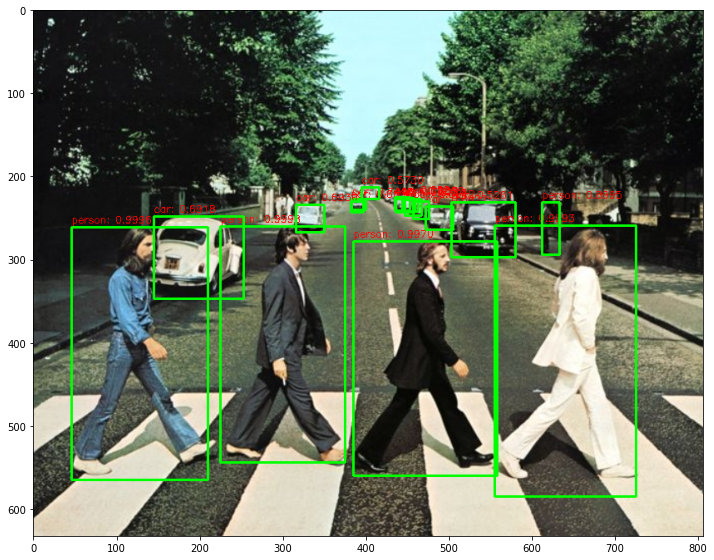

In [ ]:
start = time.time()

# 원본 이미지가 Faster RCNN기반 네트웍으로 입력 시 resize됨. 
# scaling된 이미지 기반으로 bounding box 위치가 예측 되므로 이를 다시 원복하기 위해 원본 이미지 shape정보 필요
# w, h를 0~1사이 값(비율)으로 반환하기 때문에 원본 w, h와 곱해줘야 함.
rows = img.shape[0]
cols = img.shape[1]
# cv2의 rectangle()은 인자로 들어온 이미지 배열에 직접 사각형을 업데이트 하므로 그림 표현을 위한 별도의 이미지 배열 생성. 
draw_img = img.copy()

# 원본 이미지 배열 BGR을 RGB로 변환하여 배열 입력(swapRB). 
# Tensorflow Faster RCNN은 마지막 classification layer가 Dense가 아니여서 size를 고정할 필요는 없음. - ROI pooling(fast RCNN처럼?) 그래도 안될텐데?? 잘못된 정보아닐까. 그냥 모델 들어갔을때 처리해주는건 아닐지
cv_net.setInput(cv2.dnn.blobFromImage(img, swapRB=True, crop=False))

# Object Detection 수행하여 결과를 cvOut으로 반환 
cv_out = cv_net.forward()   # inference
print(cv_out.shape)

# bounding box의 테두리와 caption 글자색 지정
green_color=(0, 255, 0)
red_color=(0, 0, 255)

# print(cv_out[0,0, :, :].shape). # (100, 7)
# detected 된 object들을 iteration 하면서 정보 추출
for detection in cv_out[0,0,:,:]:  #100번의 loop를 돈다.
    # detection shape : 7 (행벡터)
    # print(detection.shape)

    # 0은 의미 없음
    score = float(detection[2])
    class_id = int(detection[1])
    # detected된 object들의 score가 0.5 이상만 추출
    if score > 0.5:
        # detected된 object들은 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
        left = detection[3] * cols
        top = detection[4] * rows
        right = detection[5] * cols
        bottom = detection[6] * rows
        # labels_to_names_seq 딕셔너리로 class_id값을 클래스명으로 변경.
        caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
        print(caption)
        #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
        cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
        cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

print(f'걸린시간(초) {time.time()- start: .2f}')

opencv에서 inference는 CPU기반이기 때문에, inference 시간도 꽤나 걸림.

In [ ]:
# shape : (1, 1, 100, 7)
# 1, 1은 의미 없음. 100: obj 갯수
# 7: 의미없음, 클래스id, class confidence(score), coordinates(xmin, ymin, xmax, ymax)
# 좌표는 0~1사이 값으로 비율임.
cv_out.shape, cv_out

((1, 1, 100, 7), array([[[[0.00000000e+00, 0.00000000e+00, 9.99780715e-01,
           2.80248284e-01, 4.11070347e-01, 4.66062069e-01,
           8.59829903e-01],
          [0.00000000e+00, 0.00000000e+00, 9.99588192e-01,
           5.82912564e-02, 4.13466036e-01, 2.61212528e-01,
           8.93701494e-01],
          [0.00000000e+00, 0.00000000e+00, 9.99259293e-01,
           6.89431846e-01, 4.10281926e-01, 8.99752796e-01,
           9.24375653e-01],
          [0.00000000e+00, 0.00000000e+00, 9.96988714e-01,
           4.78255421e-01, 4.39302981e-01, 6.92748547e-01,
           8.84738147e-01],
          [0.00000000e+00, 0.00000000e+00, 8.99451733e-01,
           7.59500206e-01, 3.65392357e-01, 7.86593020e-01,
           4.65826124e-01],
          [0.00000000e+00, 0.00000000e+00, 2.80753374e-01,
           7.87774742e-01, 3.81029904e-01, 8.25374067e-01,
           4.47248816e-01],
          [0.00000000e+00, 0.00000000e+00, 1.82083517e-01,
           3.73442054e-01, 3.48522216e-01, 3.8397

#### 단일 이미지의 object detection을 함수로 생성
비디오 inference할때 쉽게 쓰기위해서 함수화.

In [ ]:
import time

def get_detected_img(cv_net, img_array, score_threshold, use_copied_array=True, is_print=True):
    """
    get_detected_img(모델, 이미지, 스코어threshold, 원본에 그릴지 복사본에 그릴지, 수행시간 찍을지)
    """
    
    rows = img_array.shape[0]
    cols = img_array.shape[1]
    
    draw_img = None
    if use_copied_array:
        draw_img = img_array.copy()
    else:
        draw_img = img_array
    
    cv_net.setInput(cv2.dnn.blobFromImage(img_array, swapRB=True, crop=False))
    
    start = time.time()
    cv_out = cv_net.forward()
    
    green_color=(0, 255, 0)
    red_color=(0, 0, 255)

    # detected 된 object들을 iteration 하면서 정보 추출
    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])
        # detected된 object들의 score가 함수 인자로 들어온 score_threshold 이상만 추출
        if score > score_threshold:
            # detected된 object들은 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows
            # labels_to_names 딕셔너리로 class_id값을 클래스명으로 변경. opencv에서는 class_id + 1로 매핑해야함.
            caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
            print(caption)
            #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
            cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)
    if is_print:
        print('Detection 수행시간:',round(time.time() - start, 2),"초")

    return draw_img

image shape: (633, 806, 3)
person: 0.9998
person: 0.9996
person: 0.9993
person: 0.9970
person: 0.8995
car: 0.8922
car: 0.7602
car: 0.7415
car: 0.6930
car: 0.6918
car: 0.6896
car: 0.6717
car: 0.6521
car: 0.5730
car: 0.5679
car: 0.5261
car: 0.5012
Detection 수행시간: 8.41 초


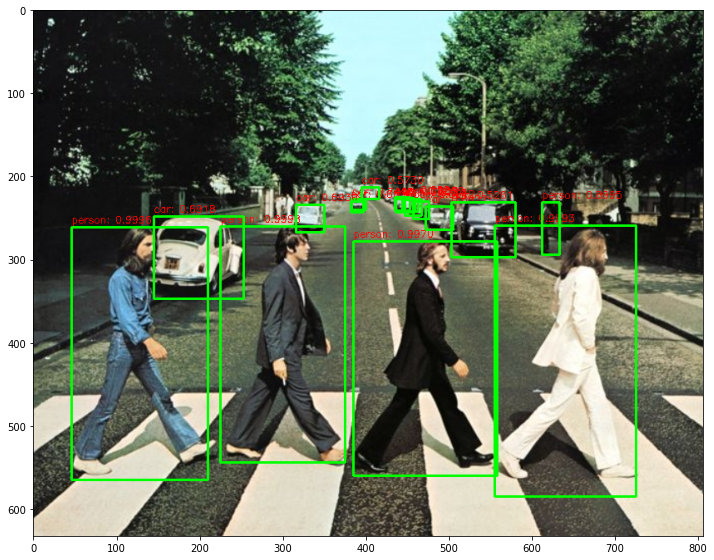

In [ ]:
# image 로드 
img = cv2.imread('./data/beatles01.jpg')
print('image shape:', img.shape)

# tensorflow inference 모델 로딩
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb', 
                                     './pretrained/config_graph.pbtxt')
# Object Detetion 수행 후 시각화 
draw_img = get_detected_img(cv_net, img, score_threshold=0.5, use_copied_array=True, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

In [ ]:
# 다른 image 테스트
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

--2022-04-28 14:10:39--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76279 (74K) [image/jpeg]
Saving to: ‘./data/baseball01.jpg’

./data/baseball01.j 100%[===================>]  74.49K  --.-KB/s    in 0.008s  

2022-04-28 14:10:39 (9.69 MB/s) - ‘./data/baseball01.jpg’ saved [76279/76279]



image shape: (476, 735, 3)
person: 0.9998
person: 0.9997
person: 0.9977
sports ball: 0.8867
baseball bat: 0.8420
baseball glove: 0.9815
Detection 수행시간: 7.25 초


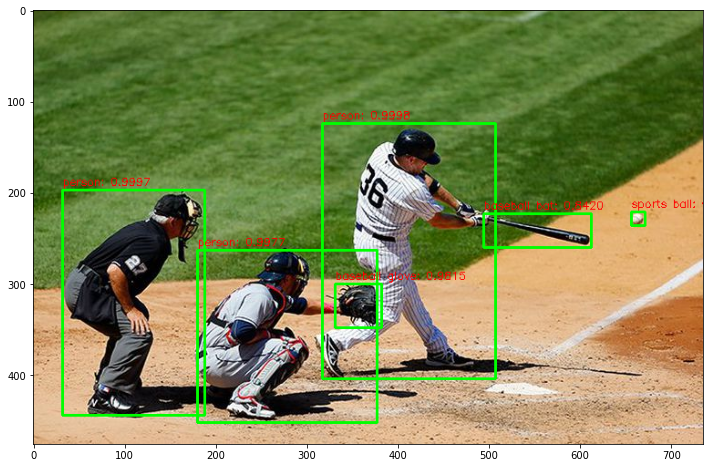

In [ ]:
img = cv2.imread('./data/baseball01.jpg')
print('image shape:', img.shape)

# tensorflow inference 모델 로딩
cv_net = cv2.dnn.readNetFromTensorflow('./pretrained/faster_rcnn_resnet50_coco_2018_01_28/frozen_inference_graph.pb', 
                                     './pretrained/config_graph.pbtxt')
# Object Detetion 수행 후 시각화 
draw_img = get_detected_img(cv_net, img, score_threshold=0.5, use_copied_array=True, is_print=True)

img_rgb = cv2.cvtColor(draw_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(img_rgb)

### Video Object Detection 수행

#### 원본 영상 보기
약 2초 영상

In [ ]:
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2022-04-28 14:10:48--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2022-04-28 14:10:48--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2022-04-28 14:10:48--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.

### colab에서 직접 비디오를 출력하는 함수를 집어넣었음.
* 출처: https://stackoverflow.com/questions/57377185/how-play-mp4-video-in-google-colab

In [ ]:
from IPython.display import HTML
from base64 import b64encode

def get_video_obj(path):
    mp4 = open(path,'rb').read()

    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML("""
    <video width=700 controls>
        <source src="%s" type="video/mp4">
    </video>
    """ % data_url)

In [ ]:
input_video = "/content/data/Jonh_Wick_small.mp4"
play = get_video_obj(input_video)
play

#### VideoCapture와 VideoWriter 설정하기
* VideoCapture를 이용하여 Video를 frame별로 capture 할 수 있도록 설정
* VideoCapture의 속성을 이용하여 Video Frame의 크기 및 FPS 설정. 
* VideoWriter를 위한 인코딩 코덱 설정 및 영상 write를 위한 설정 

In [ ]:
video_input_path = '/content/data/Jonh_Wick_small.mp4'

cap = cv2.VideoCapture(video_input_path)
frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))  # frame 출력
print('총 Frame 갯수:', frame_cnt)

총 Frame 갯수: 58


총 58번의 loop를 돌면서 obj detection 진행

#### Codec 설정 이슈
* 아래 XVID로 코덱을 설정시, 위에서 만든 jupyter에서 동영상 실행 코드가 먹히지 않음.
* 다른 코덱들을 테스트할 필요 있음.

In [ ]:
video_input_path = '/content/data/Jonh_Wick_small.mp4'
video_output_path = '/content/data/John_Wick_small_cv01.mp4'

cap = cv2.VideoCapture(video_input_path)

# video를 어떤 포맷으로 쓸것인지. 코덱리스트 : https://m.blog.naver.com/jws2218/221505827331
codec = cv2.VideoWriter_fourcc(*'XVID')
# codec = cv2.VideoWriter_fourcc(*'MP4V') # DIVX, MJPG


# video쓸때 크기와 fps를 동일하게 설정하기 위해서 input 속성값 가져옴
vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))) 
vid_fps = cap.get(cv2.CAP_PROP_FPS )
    
vid_writer = cv2.VideoWriter(video_output_path, codec, vid_fps, vid_size) 

frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print('총 Frame 갯수:', frame_cnt)

총 Frame 갯수: 58


In [ ]:
!ls /content/data

baseball01.jpg	beatles01.jpg  John_Wick_small_cv01.mp4  Jonh_Wick_small.mp4


##### 총 Frame 별로 iteration 하면서 Object Detection 수행. 개별 frame별로 단일 이미지 Object Detection과 유사
* 유의사항 : 오래걸림!!!
* 8초 x 58프레임 = 약 8분 

In [ ]:
# bounding box의 테두리와 caption 글자색 지정
green_color=(0, 255, 0)
red_color=(0, 0, 255)

idx = 0
while True:

    # hasFrame: next frame이 있는지 없는지. boolean
    hasFrame, img_frame = cap.read() # 58개의 프레임을 하나씩 읽는다.
    if not hasFrame:
        print('더 이상 처리할 frame이 없습니다.')
        break
    
    if idx == 11:
        break
    rows = img_frame.shape[0]
    cols = img_frame.shape[1]
    # 원본 이미지 배열 BGR을 RGB로 변환하여 배열 입력
    cv_net.setInput(cv2.dnn.blobFromImage(img_frame,  swapRB=True, crop=False))
    
    start= time.time()
    # Object Detection 수행하여 결과를 cv_out으로 반환 
    cv_out = cv_net.forward()
    frame_index = 0
    # detected 된 object들을 iteration 하면서 정보 추출
    for detection in cv_out[0,0,:,:]:
        score = float(detection[2])
        class_id = int(detection[1])
        # detected된 object들의 score가 0.5 이상만 추출
        if score > 0.5:
            # detected된 object들은 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
            left = detection[3] * cols
            top = detection[4] * rows
            right = detection[5] * cols
            bottom = detection[6] * rows
            # labels_to_names_0딕셔너리로 class_id값을 클래스명으로 변경.
            caption = "{}: {:.4f}".format(labels_to_names_0[class_id], score)
            #print(class_id, caption)
            #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
            cv2.rectangle(img_frame, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
            cv2.putText(img_frame, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, red_color, 1)
    print('Detection 수행 시간:', round(time.time()-start, 2),'초')
    vid_writer.write(img_frame)

    idx += 1
# end of while loop

vid_writer.release()
cap.release()   

Detection 수행 시간: 7.99 초
Detection 수행 시간: 7.78 초
Detection 수행 시간: 7.72 초
Detection 수행 시간: 9.81 초
Detection 수행 시간: 7.92 초
Detection 수행 시간: 7.78 초
Detection 수행 시간: 7.77 초
Detection 수행 시간: 9.03 초
Detection 수행 시간: 8.04 초
Detection 수행 시간: 8.2 초
Detection 수행 시간: 7.72 초


In [ ]:
video_output_path

'/content/data/John_Wick_small_cv01.mp4'

In [ ]:
# colab의 codec 내부 문제 때문에 만들어진 동영상은 임베딩실패(실행되지 않음.)
play = get_video_obj(video_output_path)
play

#### video detection 전용 함수 생성. 

In [ ]:
def do_detected_video(cv_net, input_path, output_path, score_threshold, is_print):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        
        img_frame = get_detected_img(cv_net, img_frame, score_threshold=score_threshold, use_copied_array=False, is_print=is_print)
        
        vid_writer.write(img_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

In [ ]:
video_output_path2 = './data/John_Wick_small_02.mp4'
do_detected_video(cv_net, video_input_path, video_output_path2, 0.2, False)

In [ ]:
play = get_video_obj(video_output_path2)
play